# Estimación del progreso de la vacunación

## ARMA, ARIMA

In [77]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
from pandas import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [78]:
def preprocesado_pais(covid_vaccine_data,pais):
    """
    covid_vaccine_data: dataframe con todas las vacunas
    pais: pais que queremos escoger para analizar
    """
    vacc_pais = covid_vaccine_data.loc[covid_vaccine_data.country == pais]
    #print(pais)
    vacc_pais.set_index('date',inplace=True)
    
    
    #crear una funcion de preprocesado
    vacc_pais['daily_vaccinations']= vacc_pais['daily_vaccinations'].interpolate(method='cubicspline')
    vacc_pais['total_vaccinations']= vacc_pais['total_vaccinations'].interpolate(method='cubicspline')
    vacc_pais['people_vaccinated']= vacc_pais['people_vaccinated'].interpolate(method='cubicspline')

    vacc_pais['people_fully_vaccinated']= vacc_pais['people_fully_vaccinated'].interpolate(method='cubicspline')
    vacc_pais['total_vaccinations_per_hundred']= vacc_pais['total_vaccinations_per_hundred'].interpolate(method='cubicspline')
    vacc_pais['people_vaccinated_per_hundred']= vacc_pais['people_vaccinated_per_hundred'].interpolate(method='cubicspline')

    vacc_pais['people_fully_vaccinated_per_hundred']=vacc_pais['people_fully_vaccinated_per_hundred'].interpolate(method='cubicspline')
    vacc_pais['daily_vaccinations_per_million']= vacc_pais['daily_vaccinations_per_million'].interpolate(method='cubicspline')

    vacc_pais = vacc_pais.fillna(vacc_pais.median())
    
    vacc_pais["date"] = vacc_pais.index
    vacc_pais["Days"]=vacc_pais.date - vacc_pais.date.min()
    vacc_pais["Days"]=vacc_pais["Days"].dt.days
    
    population = vacc_pais["Population"][1]
    vacc_pais['percentage_vaccinated'] = (vacc_pais.people_fully_vaccinated/population)*100
    
    return vacc_pais

In [79]:
covid_vaccine_data = pd.read_csv('covid_vaccine_data.csv')

covid_vaccine_data['date'] = pd.to_datetime(covid_vaccine_data['date'])
#df = df.sort_values('date', ascending=True)
covid_vaccine_data['date'] = covid_vaccine_data['date'].dt.strftime('%Y-%m-%d')
covid_vaccine_data[['date']] = covid_vaccine_data[['date']].apply(pd.to_datetime)

#DATOS DE ESPAÑA
vacc_Spain = preprocesado_pais(covid_vaccine_data,'Spain')

#vacc_Spain = covid_vaccine_data.loc[covid_vaccine_data.country == 'Spain']
#vacc_Spain.set_index('date',inplace=True)
vacc_Spain.shape

(122, 20)

In [80]:
len(covid_vaccine_data.date.unique())

144

In [81]:
vacc_Spain.isnull().sum()

Unnamed: 0                             0
iso_code                               0
country                                0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
Population                             0
Full_vaccinations(count)               0
Total_vaccinations(count)              0
date                                   0
Days                                   0
percentage_vaccinated                  0
dtype: int64

In [82]:
len(vacc_Spain)

122

In [83]:
vacc_Spain.T

date,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
Unnamed: 0,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377
iso_code,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,...,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
country,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
total_vaccinations,82834,139339,167094,207323,277976,325328,358018,406091,488122,581638,...,1.49947e+07,1.53779e+07,1.58598e+07,1.63646e+07,1.67333e+07,1.69821e+07,1.71786e+07,1.74308e+07,1.79166e+07,1.84896e+07
people_vaccinated,82834,139339,167094,207323,277976,325327,358015,406091,488122,581638,...,1.10139e+07,1.12612e+07,1.15201e+07,1.17634e+07,1.19386e+07,1.20682e+07,1.21961e+07,1.23812e+07,1.26863e+07,1.29666e+07
people_fully_vaccinated,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,1.65147e+06,...,4.02094e+06,4.16676e+06,4.41378e+06,4.68977e+06,4.8942e+06,5.02665e+06,5.1136e+06,5.2023e+06,5.39432e+06,5.69683e+06
daily_vaccinations,102279,56505,45248,41496,48786,47569,46759,46180,49826,58330,...,305867,333833,337423,350662,338524,345164,351805,348020,362672,375687
total_vaccinations_per_hundred,0.18,0.3,0.356773,0.44,0.59,0.69402,0.767437,0.87,1.04,1.24,...,32.07,32.89,33.92,35,35.7885,36.3199,36.74,37.28,38.32,39.55
people_vaccinated_per_hundred,0.18,0.3,0.356773,0.44,0.59,0.694014,0.767426,0.87,1.04,1.24,...,23.56,24.09,24.64,25.16,25.5378,25.8176,26.09,26.48,27.13,27.73
people_fully_vaccinated_per_hundred,3.53056,3.53056,3.53056,3.53056,3.53056,3.53056,3.53056,3.53056,3.53056,3.53056,...,8.6,8.91,9.44,10.03,10.4678,10.7527,10.94,11.13,11.54,12.18


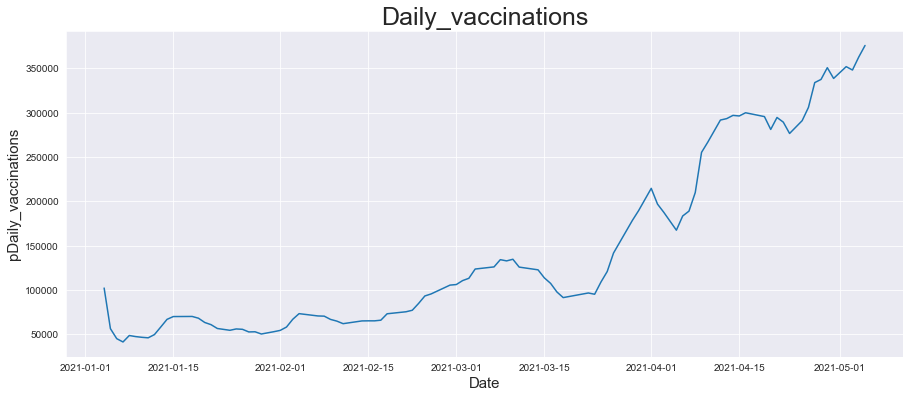

In [84]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=vacc_Spain['daily_vaccinations'])
#sns.lineplot(data = vacc_Spain['daily_vaccinations'])
plt.title('Daily_vaccinations',fontsize=25)
plt.xlabel('Date',fontsize=15)
plt.ylabel('pDaily_vaccinations', fontsize=15)
plt.show()

### Media semanal y mensual

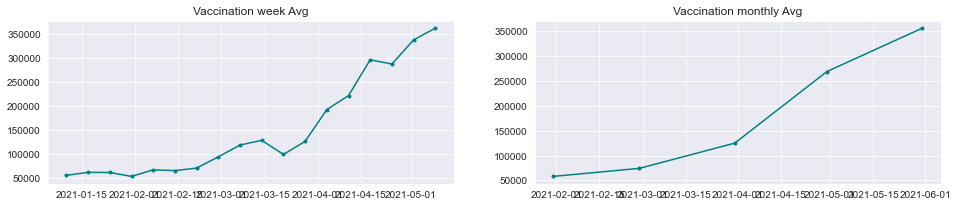

In [85]:
vacc_weekly_avg = vacc_Spain.resample('W').apply(np.mean)
vacc_monthly_avg = vacc_Spain.resample('M').apply(np.mean)
plt.figure(figsize=(16,3))
plt.subplot(121)
plt.title('Vaccination week Avg')
plt.plot(vacc_weekly_avg.daily_vaccinations, "-o", markersize=3, color='teal')
plt.subplot(122)
plt.title('Vaccination monthly Avg')
plt.plot(vacc_monthly_avg.daily_vaccinations, "-o", markersize=3, color='teal')

Otra forma de capturar la tendencia es a través de la media móvil que haremos a continuación. Básicamente tomamos una ventana de puntos de datos consecutivos, en nuestro caso se trata de una frecuencia diaria, calculamos la media de los mismos, y sustituimos toda la ventana por esa media, ya sea en el extremo derecho o en el centro de la ventana. Así que la ventana de 7 es lo mismo que la media semanal:

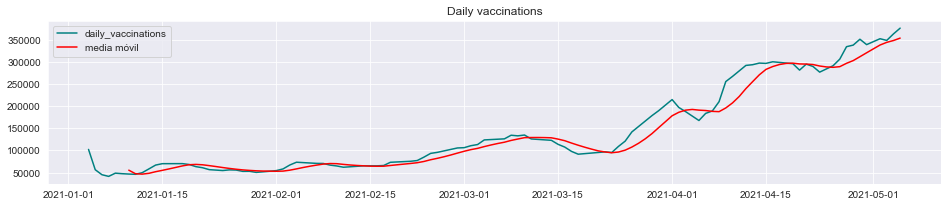

In [86]:
rolling_mean = vacc_Spain.daily_vaccinations.rolling(window=7, center=False).mean() #window of 7 (weekly avg) captures our data better 
plt.figure(figsize=(16,3))
plt.plot(vacc_Spain.daily_vaccinations, color='teal', label = 'daily_vaccinations')
plt.plot(rolling_mean, 'red',label = 'media móvil')
plt.title('Daily vaccinations')
plt.legend()

### Datos sean estacionarios y la autocorrelación¶

Tras algunas exploraciones iniciales, ha llegado el momento de crear nuestro modelo. Para ello, primero tenemos que hacer que la serie sea estacionaria, ya que es un requisito previo para la mayoría de los modelos. Hacer que los datos sean estacionarios significa quitarles la tendencia (quitarles la tendencia a los datos) para que sus propiedades estadísticas (es decir, la media y la varianza) sean constantes a lo largo del tiempo. Esto ayudará a que la muestra sea más predecible para el modelo, ya que se puede suponer que las propiedades estadísticas de los datos serán las mismas en el futuro que en el pasado. Una forma de estacionar una serie temporal es mediante la diferenciación, es decir, tomando la diferencia de dos puntos de datos dentro de un periodo determinado, este periodo se denomina **retardo** (lag) .

Para encontrar el **lag** óptimo utilizamos el método de autocorrelación.


Text(0, 0.5, 'Autocorrelation')

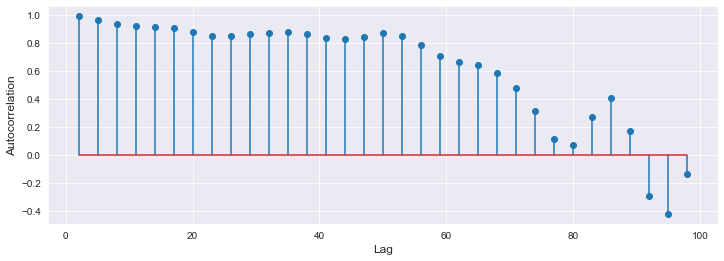

In [87]:
#lags = [7, 8, 10, 14, 17, 28, 30, 60, 90, 180]
lags = np.arange(2,100,3)
autocorrs = [vacc_Spain.daily_vaccinations.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(12, 4))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

Según el gráfico anterior, la mayor correlación se produce con un desfase de 2, lo que significa que los datos repiten un patrón semanalmente.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

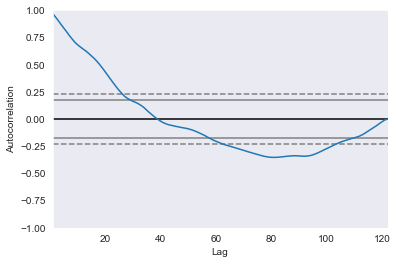

In [88]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(vacc_Spain['daily_vaccinations'])

(No me convence mucho el plot de autocorrelación)

Podemos concluir que un desfase de 2 es un buen candidato para el desfase óptimo. Vamos a trazar la serie original frente a la versión retardada de la misma con una diferencia de 2. Esto significa que cada punto de datos (a partir del 2º) se deducirá de los datos de 7 días anteriores y se trazará en el gráfico (línea naranja inferior).

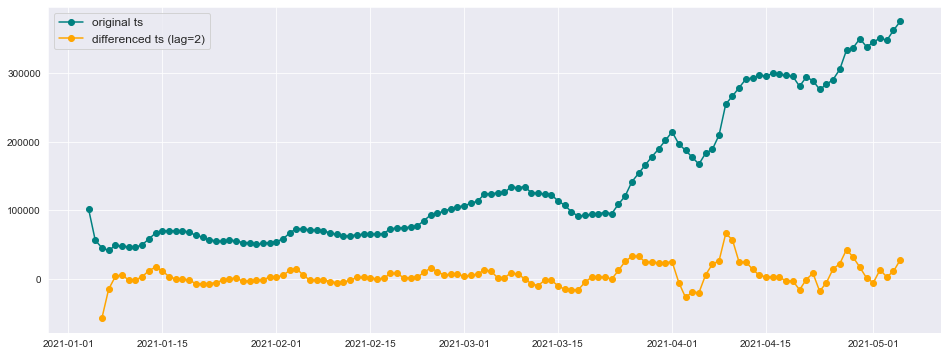

In [89]:
plt.figure(figsize=(16, 6))
plt.plot(vacc_Spain.daily_vaccinations, '-o', color='teal', label="original ts")
plt.plot(vacc_Spain.daily_vaccinations.diff(2), '-o', color='orange', label="differenced ts (lag=2)")
plt.legend(fontsize=12)

## Developing the models


Text(0.5, 1.0, 'Vacunaciones diarias')

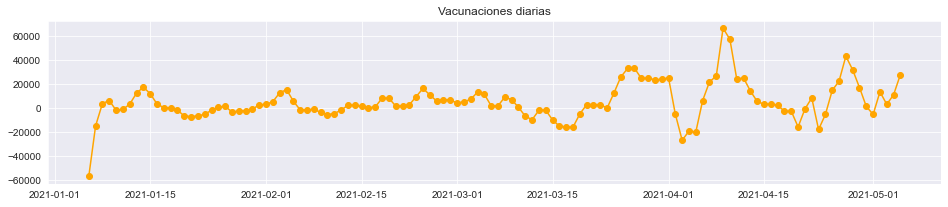

In [90]:
daily_vaccinations = vacc_Spain.daily_vaccinations
daily_vaccinations_diff = daily_vaccinations.diff(2)

plt.figure(figsize=(16,3))
plt.plot(daily_vaccinations_diff, "-o", color='orange')
plt.title('Vacunaciones diarias')

La figura anterior parece lo suficientemente estacionaria, por lo que se elige optlag=2 para las siguientes operaciones

Para empezar, guardemos los datos estacionarios en una nueva variable y llamémosla time_series:

In [91]:
time_series = daily_vaccinations_diff


### Now lets try with SKLearn linearRegression and then AR and ARMA models (time_series has not changed still diff=2)


Para la regresión lineal sobre series temporales necesitamos organizar los datos con la matriz X donde cada fila contiene un viento de previsión e y son los valores objetivo para cada fila de X.

In [92]:
time_series

date
2021-01-04        NaN
2021-01-05        NaN
2021-01-06   -57031.0
2021-01-07   -15009.0
2021-01-08     3538.0
               ...   
2021-05-01    -5498.0
2021-05-02    13281.0
2021-05-03     2856.0
2021-05-04    10867.0
2021-05-05    27667.0
Name: daily_vaccinations, Length: 122, dtype: float64

In [93]:
#time_series

time_series = time_series.fillna(time_series.median())

In [94]:
def organize_data(to_forecast, window, horizon=1):
    
    shape = to_forecast.shape[:-1] + (to_forecast.shape[-1] - window + 1, window)
    strides = to_forecast.strides + (to_forecast.strides[-1],)
    X = np.lib.stride_tricks.as_strided(to_forecast,
                                        shape=shape,
                                        strides=strides)
    y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
    return X[:-horizon], y

lag = 2
X, y = organize_data(np.array(time_series), lag)

MAE = 6648.548
MAE2 = 6838.127


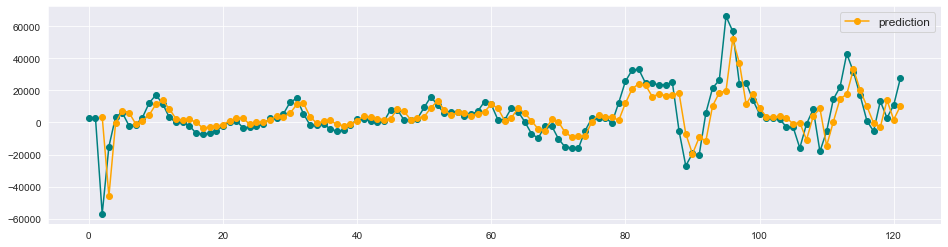

In [95]:
lr = LinearRegression()
lr_fit = lr.fit(X, y)
lr_prediction = lr_fit.predict(X)

plt.figure(figsize=(16, 4))
plt.plot(time_series.values, '-o', color='teal')
plt.plot(np.arange(lag, len(time_series)), lr_prediction, '-o', label='prediction', color='orange')
plt.legend(fontsize=12);

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[lag:], lr_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-90:], lr_prediction[-90:]))) #for the last 90 days only

#### AR Model


**AR** significa modelo de serie temporal autorregresivo, en el que los valores se modelan como una combinación lineal de los p valores pasados, por lo que se indica como AR(p).
p define el número de observaciones pasadas que queremos que el modelo utilice para predecir los próximos datos y también se conoce como el orden de retardo.

Podemos utilizar el método select_order para encontrar el valor óptimo de p como se indica a continuación, tenga en cuenta que tendrá que definir maxlag que es la mayor longitud de lag que se va a probar. ic es el criterio utilizado para seleccionar el lag óptimo, you can use different values for it defined in the [docs] (http://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AR.fit.html#statsmodels.tsa.ar_model.AR.fit) and see how those perform. I found 'aic' better for this task.


In [96]:
import warnings 
warnings.filterwarnings("ignore")

ar = tsa.AR(time_series)
optlag = ar.select_order(60, ic='aic') 
print("Best optimal lag for ar model: {}".format(optlag))

Best optimal lag for ar model: 13


Optimal lag for AR model: 13

Optimal p value seems to be 13 days, having that we can train our model and see how it performs using mean absolute error (MAE) or mean of the residuals which is calculated as below, where y and x are predicted versus actual values per observation:

I am also printing out MAE_2 which is the mean absolute error only for the last 90 predictions as a fixed set to compare the results of this model with ARMA model later on.


MAE = 5154.724
MAE2 = 5741.359


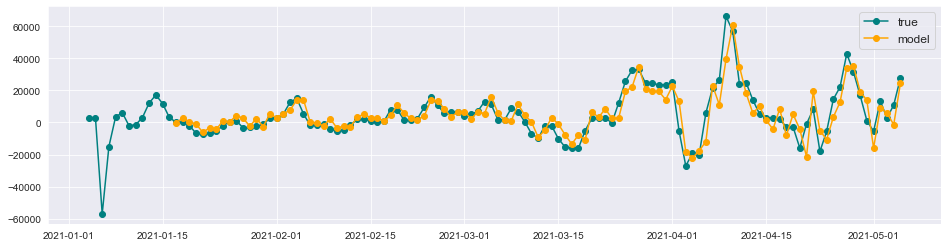

In [97]:
lag = 13 
ar = tsa.AR(time_series)
ar_fit = ar.fit(maxlag=lag, ic='aic')
ar_prediction = ar_fit.predict(start=lag)

plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label='true', color='teal')
plt.plot(ar_prediction, '-o', label='model', color='orange')
plt.legend(fontsize=12);

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[lag:], ar_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-90:], ar_prediction[-90:]))) #error only for the last 90 days

### ARMA model

ARMA stands for Autoregressive Moving Average. The difference between ARMA and AR is that the latter models a point in the time series as a linear model of the previous values, and treats the error between the actual data and the predictions as noise. But what if there could still be information in the series of errors? ARMA on the other hand includes the past errors as additional features to the model and is defined as ARMA(p,q).

Just as the name suggests ARMA is comprised of two models, AR(p) (just like above) and MA(q) which is the moving average part and q defines the number of moving average terms.
Let's now run the model with p=7 and q=7 and see the results. You should also play around with these two variables and see the different results that they produce.


In [98]:
#time_series = np.array(time_series)

# Autoregressive Moving Average ARMA

MAE = 8455.33
MAE2 = 10920.00


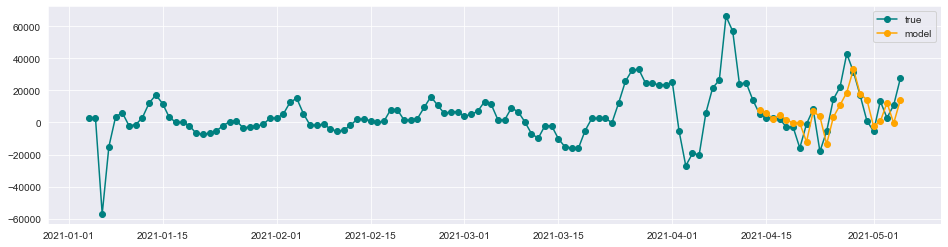

In [99]:
arma = tsa.ARMA(time_series, order=(2, 1)) #2 p and 1 q for lag and moving average 
arma_fit = arma.fit()
start=100
arma_prediction = arma_fit.predict(start=start)

plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label='true', color='teal')
plt.plot(arma_prediction, '-o', label='model', color='orange')
plt.legend();

print('MAE = {0:.2f}'.format(mean_absolute_error(time_series[start:], arma_prediction)))
print('MAE2 = {0:.2f}'.format(mean_absolute_error(time_series[-13:], arma_prediction[-13:]))) #error only for the last 90 days



### Predicción fuera de la muestra (los próximos 7 días)

Hasta ahora hemos entrenado los modelos con los datos existentes y hemos evaluado su rendimiento comprobando el error medio absoluto de las predicciones frente a los valores reales. Ahora que tenemos dos modelos entrenados, vamos a utilizarlos para predecir los valores futuros (fuera de muestra).

Dado que nuestro modelo **AR** produjo un error menor, primero lo utilizaré para predecir el futuro y luego seguiré los mismos pasos para predecir el precio con los modelos **ARMA** y luego con los **ARIMA**.

Usando el mismo lag óptimo de 13, predecimos 7 valores fuera de muestra. El argumento final de la función predecir, es donde definimos el índice de la última predicción que queremos predecir. Esto para 7 predicciones fuera de muestra será la longitud de la serie + 6.


In [100]:
#7 out of sample prediction with AR 
lag = 47
ar = tsa.AR(time_series)
ar_fit = ar.fit(maxlag=lag)
ar_forecast = ar_fit.predict(end=len(time_series)+6)[-7:] 
ar_forecast

2021-05-06    44204.206138
2021-05-07    81900.408898
2021-05-08    50511.795662
2021-05-09    31123.177868
2021-05-10    38320.802269
2021-05-11    21177.036287
2021-05-12    52840.113343
Freq: D, dtype: float64

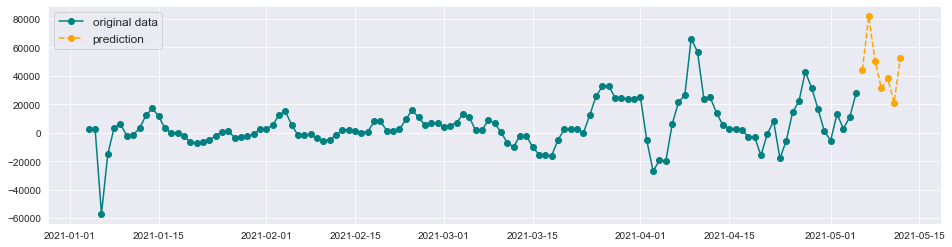

In [101]:
#AR model's 7 out of sample predictions
plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label="original data", color='teal')
plt.plot(ar_forecast, '--o', label='prediction', color='orange')
plt.legend(fontsize=12)

In [102]:
#7 out of sample prediction with ARMA
arma = tsa.ARMA(time_series, order=(2, 1)) 
arma = arma.fit()
arma_forecast = arma.predict(end=len(time_series)+6)[-7:]
arma_forecast

2021-05-06    19173.932529
2021-05-07    13556.913980
2021-05-08    10310.380706
2021-05-09     8161.336954
2021-05-10     6920.335057
2021-05-11     6098.116970
2021-05-12     5623.741419
Freq: D, dtype: float64

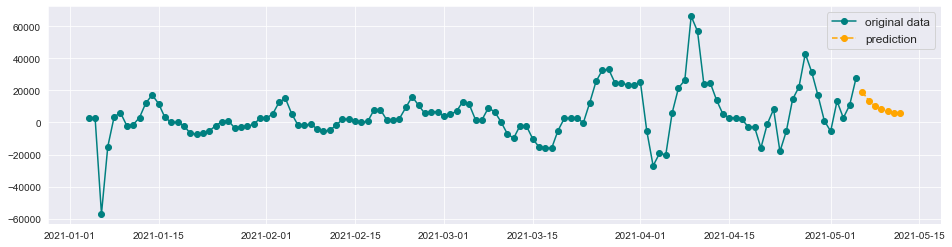

In [103]:
#ARMA model's 7 out sample predicitons 
plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label="original data", color='teal')
plt.plot(arma_forecast, '--o', label='prediction', color='orange')
plt.legend(fontsize=12)

In [104]:
#and here ARIMA which is basically same thing as ARMA but in a slightly different implementation.
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(time_series, order=(2,0,1))
arima_fit = model.fit()
arima_forecast= arima_fit.forecast(steps=7)[0]
arima_forecast

array([19173.93252874, 13556.91398033, 10310.38070648,  8161.33695393,
        6920.33505687,  6098.11696971,  5623.74141904])

Lo que hemos predicho no son los precios futuros reales, sino los **valores diferenciados**. ¿Recuerdas que inicialmente hicimos estacionarios los datos diferenciándolos con un retardo de 7? Ahora, para encontrar los precios futuros reales, tenemos que invertir el proceso y cambiar la serie de estacionaria a la forma original. Para ello, añadimos cada valor previsto al valor real de los 7 días anteriores. Los valores de los últimos 7 días en la serie original eran:

In [105]:
print(daily_vaccinations[-7:]) #the actual last 7 sample daily_vaccinations

date
2021-04-29    350662.0
2021-04-30    338524.0
2021-05-01    345164.0
2021-05-02    351805.0
2021-05-03    348020.0
2021-05-04    362672.0
2021-05-05    375687.0
Name: daily_vaccinations, dtype: float64


Una vez hecho esto, calculamos los valores reales de las 7 predicciones fuera de la muestra y los representamos con el resto de la serie:

In [106]:
idx = ar_forecast.index.values

forecast_daily_vaccinations = []
lag = 7
for i, diff in enumerate(ar_forecast): #choosing AR as it produced lower MAE than ARMA model
    prev_value = daily_vaccinations[-(lag)+i:][0]
    forecast_daily_vaccinations.append(prev_value+diff)
    
daily_vaccinations_forecast = pd.Series(forecast_daily_vaccinations, index=idx)
daily_vaccinations_forecast

2021-05-06    394866.206138
2021-05-07    420424.408898
2021-05-08    395675.795662
2021-05-09    382928.177868
2021-05-10    386340.802269
2021-05-11    383849.036287
2021-05-12    428527.113343
dtype: float64

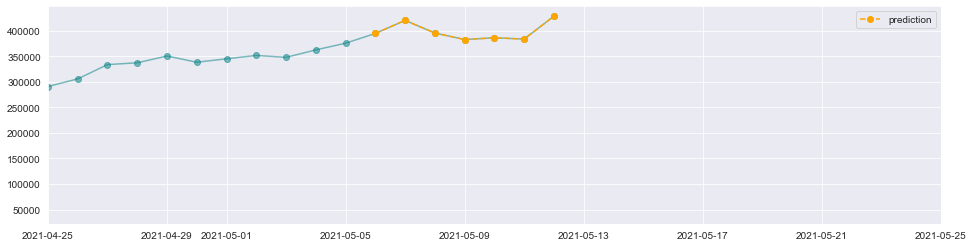

In [107]:
hist_values = vacc_Spain['daily_vaccinations'].append(daily_vaccinations_forecast)

plt.figure(figsize=(16,4))
plt.plot(hist_values, '-o', color='teal', alpha=0.5)
plt.plot(daily_vaccinations_forecast, '--o', label='prediction', color='orange')
plt.legend()

plt.xlim('2021-04-25','2021-05-25')
plt.show()